<a href="https://colab.research.google.com/github/Dnyanada-Jalindre-18/Innomatics_Internship_APR_21/blob/main/Innomatics_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis on PUBG data

## Importing libraries and dataset

In [1]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
# Importing given pubg dataset
data = pd.read_csv("/content/drive/MyDrive/data.csv")
data.head()

,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,2093518,a3e3cea9f2e314,c9f6eaa81245b5,a3d8693390584c,0,0,25.93,0,0,0,84,1437,0,0,0.000,1403,squad-fpp,31,29,-1,0,0.0,0,0.0,0,0,151.30,1,1525,0.0667
1,3701672,43e4be7ad72cc7,521836de101ee8,b65de9055327e0,0,0,36.71,0,0,0,57,1225,0,0,0.000,1971,squad-fpp,30,30,-1,0,0.0,0,0.0,0,0,1918.00,7,1516,0.5862
2,2059784,9a68690e31fdff,4a72ffa2cebd90,d6aad3f9830e60,0,1,47.73,0,0,0,50,0,0,0,0.000,1741,solo-fpp,96,89,1516,0,4088.0,0,0.0,0,0,820.00,7,0,0.8105
3,1302036,b147e1bd448fc4,9a8991656b3fea,d931c0932d8aca,0,0,0.00,0,0,0,56,1286,0,0,0.000,1738,squad-fpp,28,27,-1,1,0.0,0,0.0,0,0,38.81,0,1515,0.5556
4,297180,d818b4edd59612,eece87c8b846b3,ec2b5ed94baae3,0,2,100.00,0,0,3,31,0,1,1,7.737,2193,solo,99,95,1482,0,918.4,0,0.0,0,0,1721.00,5,0,0.6429


## Data Summary

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1111742 entries, 0 to 1111741
Data columns (total 30 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Unnamed: 0       1111742 non-null  int64  
 1   Id               1111742 non-null  object 
 2   groupId          1111742 non-null  object 
 3   matchId          1111742 non-null  object 
 4   assists          1111742 non-null  int64  
 5   boosts           1111742 non-null  int64  
 6   damageDealt      1111742 non-null  float64
 7   DBNOs            1111742 non-null  int64  
 8   headshotKills    1111742 non-null  int64  
 9   heals            1111742 non-null  int64  
 10  killPlace        1111742 non-null  int64  
 11  killPoints       1111742 non-null  int64  
 12  kills            1111742 non-null  int64  
 13  killStreaks      1111742 non-null  int64  
 14  longestKill      1111742 non-null  float64
 15  matchDuration    1111742 non-null  int64  
 16  matchType        1

### How much kill counts are there ?

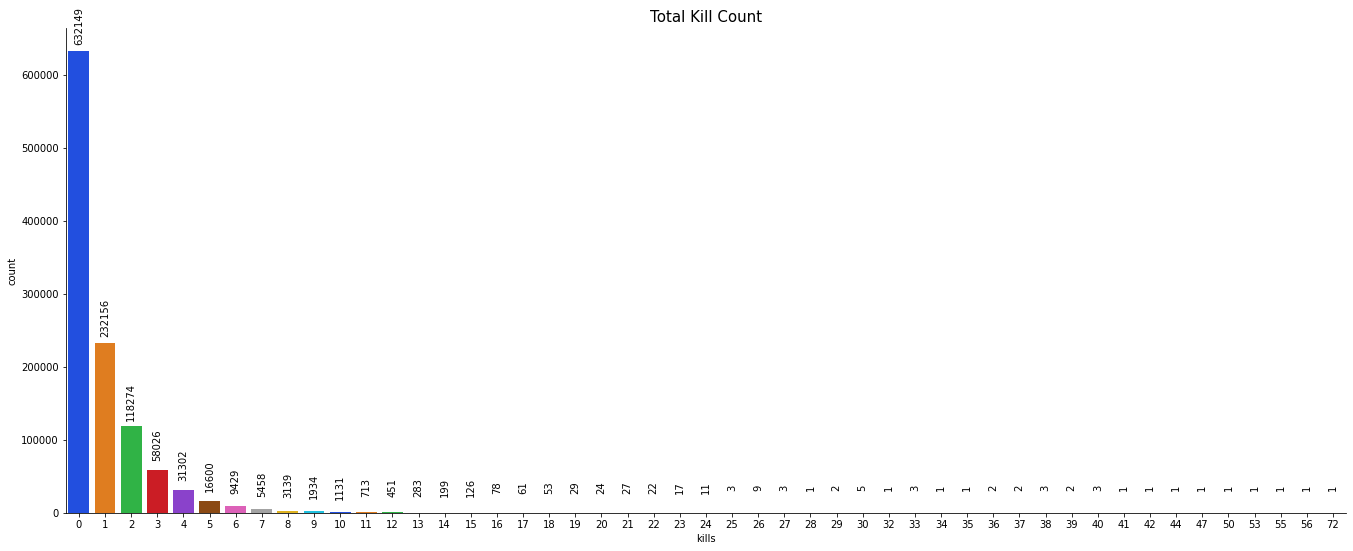

In [4]:
plots = sns.catplot(x="kills", kind="count", data=data, palette="bright",height=7.27, aspect=18.7/7.27)
plt.title("Total Kill Count",fontsize=15)
for ax in plots.axes.ravel():
  for p in ax.patches:
      ax.annotate(format(p.get_height(), '.0f'), 
      (p.get_x() + p.get_width() / 2., p.get_height()), 
      ha = 'center', va = 'center', xytext = (0, 25),textcoords = 'offset points', rotation = 90)

### Before moving forward, let's take a look at OUTLIERS...!!

1. Trying to find them using IQR method : Inter Quartile Range

In [5]:
# Calculating percentiles
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
# IQR = Inter Quartile Range
IQR = Q3 - Q1

In [6]:
# Checking for any outliers
((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).sum()

DBNOs               73607
Id                      0
Unnamed: 0              0
assists            194611
boosts              35533
damageDealt         54026
groupId                 0
headshotKills      187930
heals               81625
killPlace               0
killPoints              0
killStreaks         13391
kills              129163
longestKill        153335
matchDuration         700
matchId                 0
matchType               0
maxPlace           175374
numGroups          174599
rankPoints             21
revives            146345
rideDistance       277645
roadKills            3291
swimDistance        72617
teamKills           24387
vehicleDestroys      8366
walkDistance         6757
weaponsAcquired     19803
winPlacePerc            0
winPoints               0
dtype: int64

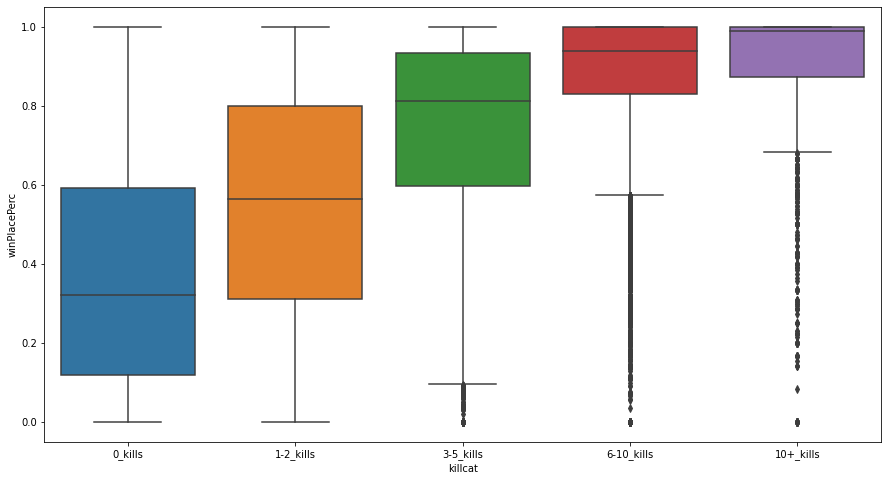

In [7]:
kills = data.copy()

kills['killcat'] = pd.cut(kills['kills'], [-1, 0, 2, 5, 10, 60], labels=['0_kills','1-2_kills', '3-5_kills', '6-10_kills', '10+_kills'])

plt.figure(figsize=(15,8))
sns.boxplot(x="killcat", y="winPlacePerc", data=kills)
plt.show()

### Match types

In [8]:
matches = data.loc[:,"matchId"].nunique()
print("There are {} matches registered in our database.".format(matches))

There are 47951 matches registered in our database.


In [9]:
match_types = data.loc[:,"matchType"].value_counts().to_frame().reset_index()
match_types.columns = ["Type","Count"]
match_types

,Type,Count
0,squad-fpp,438781
1,duo-fpp,249927
2,squad,156573
3,solo-fpp,133854
4,duo,78039
5,solo,45679
6,normal-squad-fpp,4286
7,crashfpp,1581
8,normal-duo-fpp,1400
9,flaretpp,633


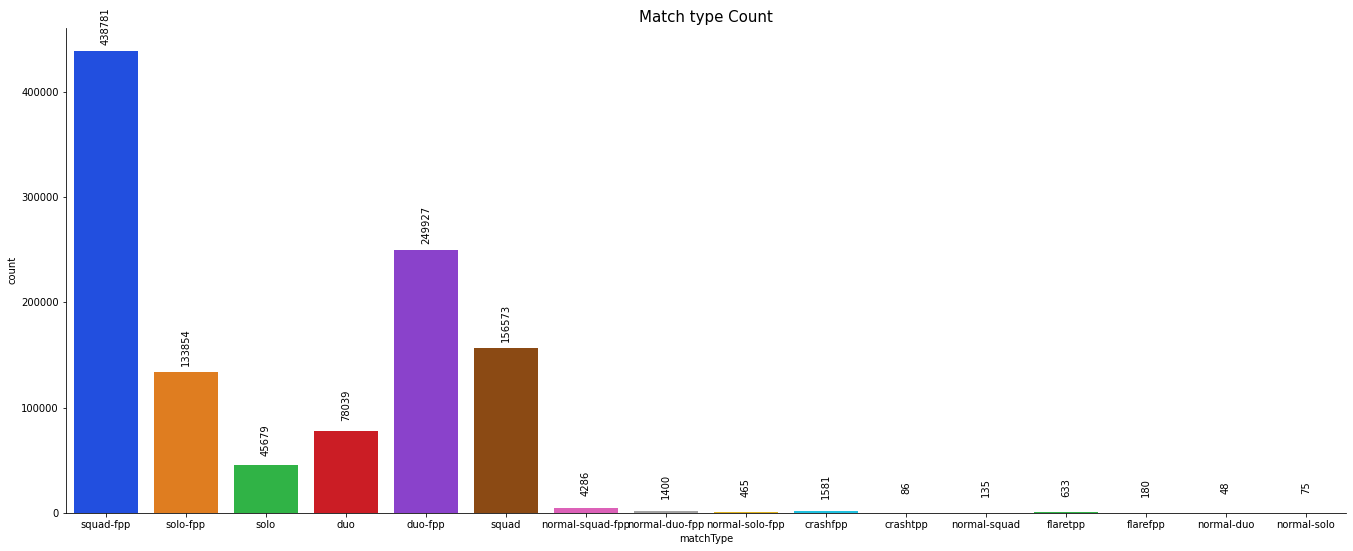

In [10]:
plots = sns.catplot(x="matchType", kind="count", data=data, palette="bright",height=7.27, aspect=18.7/7.27)
plt.title("Match type Count",fontsize=15)
for ax in plots.axes.ravel():
  for p in ax.patches:
      ax.annotate(format(p.get_height(), '.0f'), 
      (p.get_x() + p.get_width() / 2., p.get_height()), 
      ha = 'center', va = 'center', xytext = (0, 25),textcoords = 'offset points', rotation = 90)

In PUBG there are essentially three main modes of game: Solo, Duo and Squad.

In a squad mode, you play in a group of 4 players. Here we can see that the match types are further broken down taking into account view modes:

FPP - First Person Perspective
TPP - Thirst Peron Perspective
Normal - you can switch between views during a game However, I am not able to identify what flare- and crash- types of matches are.

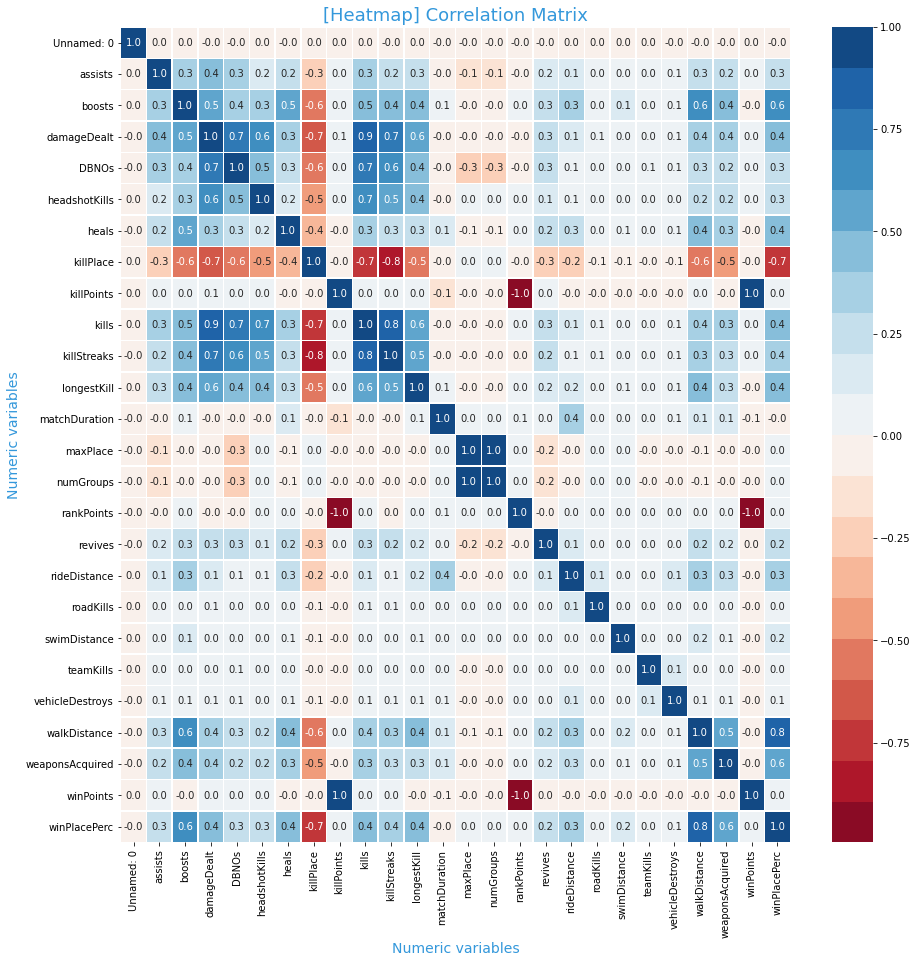

In [11]:
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax, cmap=sns.color_palette("RdBu", 20))

ax.set_xlabel('Numeric variables', size=14, color="#3498DB")
ax.set_ylabel('Numeric variables', size=14, color="#3498DB")
ax.set_title('[Heatmap] Correlation Matrix', size=18, color="#3498DB")

plt.show()

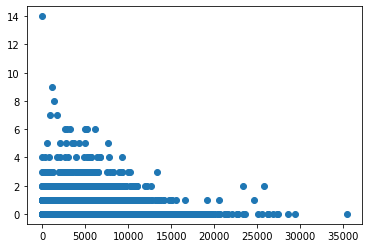

In [12]:
plt.scatter(x=data['rideDistance'], y=data['roadKills'])

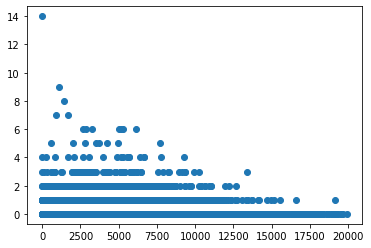

In [13]:
plt.scatter(x=data.loc[data['rideDistance'] <= 20000, 'rideDistance'], y=data.loc[data['rideDistance'] <= 20000, 'roadKills']);

It seems that distance travelled isn't really correlated with number of road kills.


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


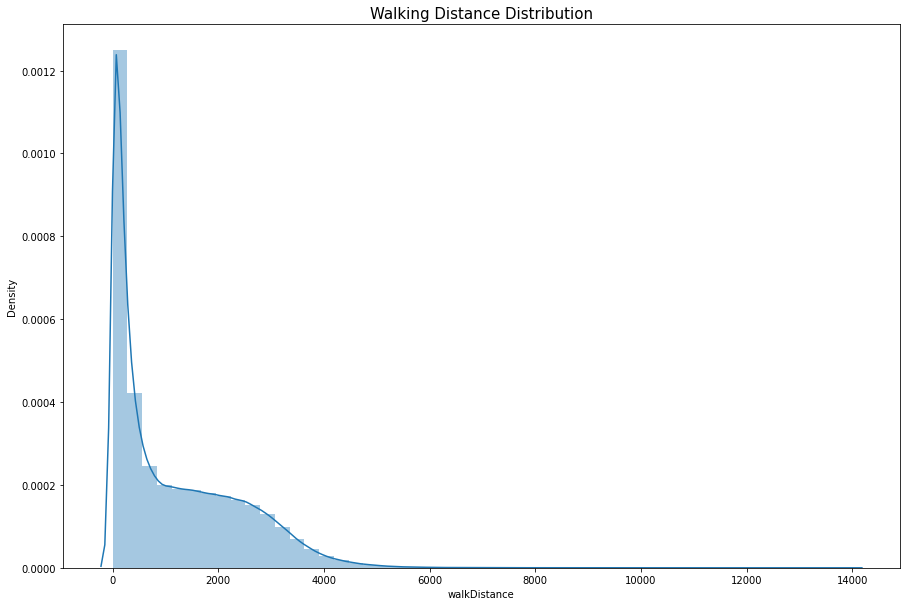

In [14]:
data_copy = data.copy()
data_copy = data_copy[data_copy['walkDistance'] < data['walkDistance'].quantile(0.99)]
plt.figure(figsize=(15,10))
plt.title("Walking Distance Distribution",fontsize=15)
sns.distplot(data['walkDistance'])
plt.show()

### Drivers

In [15]:
print("The average person drives for {:.1f}m, 99% of people have drived {}m or less, while the formula 1 champion drived for {}m.".format(data['rideDistance'].mean(), data['rideDistance'].quantile(0.99), data['rideDistance'].max()))

The average person drives for 604.2m, 99% of people have drived 6968.0m or less, while the formula 1 champion drived for 35400.0m.


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


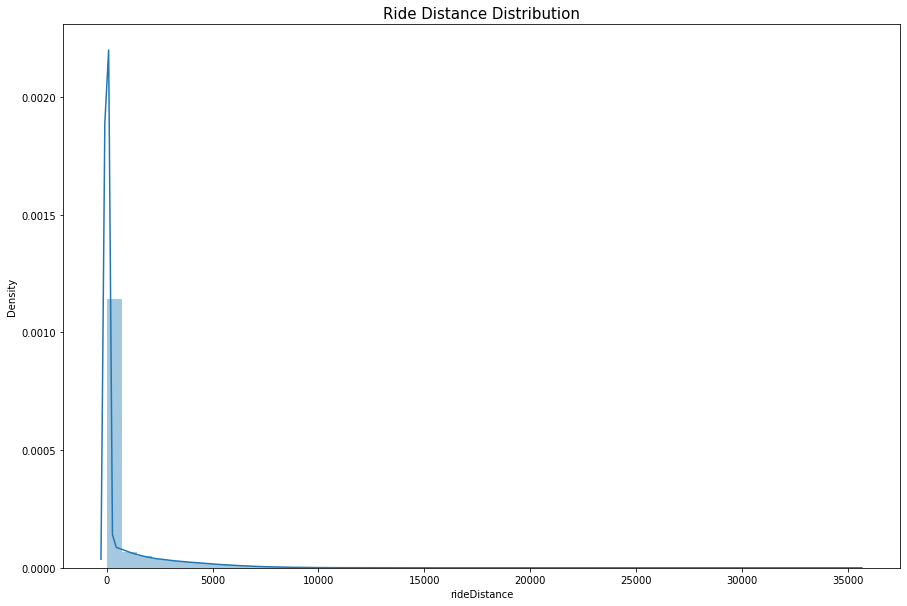

In [17]:
data_copy = data.copy()
data_copy = data_copy[data_copy['rideDistance'] < data['rideDistance'].quantile(0.9)]
plt.figure(figsize=(15,10))
plt.title("Ride Distance Distribution",fontsize=15)
sns.distplot(data['rideDistance'])
plt.show()